# THE PROBLEM: Classify Breast-Cancer Patient Using Medical Diagnosis

<div class="alert alert-block alert-warning">
Cancer is a leading cause of death along with heart disease.
<br>
<img src="https://images.medicinenet.com/images/appictures/breast-cancer-s3-causes.jpg" style="width: 200px;"/>

# Dataset

- 699 rows
- 11 columns
- no missing values
- all column types: real
- the predicted attribute column is `class`: whether the patient developed Breast Cancer


   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
   10. Mitoses                       1 - 10
   11. Class:                        (2 for benign, 4 for malignant)
  
  
Class distribution:
 
-Benign: 458 (65.5%)
-Malignant: 241 (34.5%)


The csv data file can be found at, part of the UC Irvine machine learning repository (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

In [1]:
import csv
import random
import operator

#loading our data, while spliting it between a training set and a test test.

def loadCSVData(filename, split, trainingSet=[] , testSet=[]):
    
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            
            for y in range(4):
            
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])
                
      
                
#code by Jason Brownlee https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

In [2]:
#this code is wrote in case you have a row that you want to drop

#trainingSet=[]
#testSet=[]
#loadCSVData("breast-cancer-wisconsin.data", 0.66, trainingSet, testSet)
#print ('Train: ' + repr(len(trainingSet)))
#print ('Test: ' + repr(len(testSet)))

#import pandas as pd 
#df.drop(df.columns[[0,1,3]], axis=1, inplace=True)
#df = pd.DataFrame(trainingSet)
#df2 =pd.DataFrame(testSet)
#df.drop(df.columns[[0]], axis=1, inplace=True) # we are droping the first column as it is only the patient's ID and
#df2.drop(df2.columns[[0]], axis=1, inplace=True)#this would have impeded on the euclidian distances
#code I wrote myself

#train = df.as_matrix(columns=None)
#test = df2.as_matrix(columns=None)
#'''I've encountered issue to implement the panda dataframe as it was not displayed as a list of list 
#therefore, I have converted those so that the other functions would be functionning '''


In [3]:
trainingSet2=[]
testSet2=[]
loadCSVData("breast-cancer-wisconsin.csv", 0.66, trainingSet2, testSet2)
print ('Train: ' + repr(len(trainingSet2)))
print ('Test: ' + repr(len(testSet2)))
train = trainingSet2

Train: 432
Test: 266


In [4]:
def distance(record1, record2):
    
    distance = 0
    for i in range(len(record1)):
        
        try:    distance += (record1[i] - record2[i]) ** 2
        except: pass
    return distance ** 0.5

In [5]:
#distances function
def allDistance(dataset, testRecord):
    

    distances = []

    for r in train:
      
        rWithoutTarget = r[0:-1]
        dist = distance(rWithoutTarget, testRecord)
        distances.append(dist)

    return distances

In [6]:
def Euclidiandistance(record1,record2, length):
    distance = 0
            
    for i in range(length):
        distance += pow(int(float(record1[i]) - float(record2[i])),2)
    
    return distance**0.5
    

#code I wrote 

def Neighbours(trainingSet, testRecord, k):
 
    distances = [] 
    length = len(testRecord)-1
    for x in range(len(trainingSet)): 

        dist = Euclidiandistance(testRecord, trainingSet[x], length)                                                             
        distances.append((trainingSet[x], dist)) 
    distances.sort(key=operator.itemgetter(1)) 
                                      
    neighbours = []
    for x in range(k):
       
        neighbours.append(distances[x][0]) 
    return neighbours 

               


In [7]:
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

#code by Jason Brownlee https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

In [8]:


def knnPrediction(dataset, testRecord, k):
 
    neighbours = Neighbours(dataset, testRecord, k)
    count = dict() 
    max = 0
    for n in neighbours:
       
        target = n[-1]
        try: count[target]+=1
        except: count[target]=1
        if count[target]>max:
            
                max = count[target]
                prediction = target
    probability = count[prediction]/k
    return prediction, probability

In [9]:
def getAccuracy(testSet, predictions):

    correct = 0
    for x in range(len(testSet)):
        
        if testSet[x][-1] is predictions[x]:
           
            correct += 1
    return (correct/float(len(testSet))) * 100.0

# I wrote this part

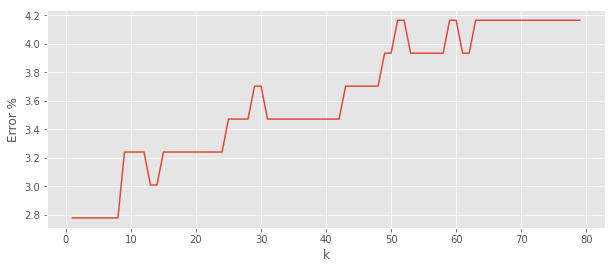

In [14]:
#Find the best K
import random
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import numpy

dataset=trainingSet2
kvals,errorvals = [],[]
for k in range(1,80):
    losses=0
    for i in range(len(dataset)):
    
        prediction, _ = knnPrediction(dataset[:i] + dataset[i+1:], dataset[i], k)
        actual = dataset[i][-1]
        if prediction != actual: losses+=1
    kvals.append(k)
    errorvals.append(100*losses/len(dataset))
    

# assume matplotlib already initialised
plt.style.use('ggplot')
plt.figure(figsize=(10,4)) 


plt.plot(kvals, errorvals)
plt.xlabel('k'); plt.ylabel('Error %');

#from seminar 8 where we were 4 students

In [11]:
def main(k):
    #global loopCounter
    # prepare data
    trainingSet= trainingSet2
    testSet= testSet2
    

    print('Train set: ' + repr(len(trainingSet)))
    print('Test set: ' + repr(len(testSet)))
    
    # generate predictions
    predictions=[]
    
    for x in range(len(testSet)):
        #loopCounter += 1
        neighbors = Neighbours(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

main(k=19) #we chose k=19 as it lowers the error rate

Train set: 432
Test set: 266
> predicted='4', actual='2'
> predicted='2', actual='2'
> predicted='4', actual='4'
> predicted='2', actual='2'
> predicted='2', actual='2'
> predicted='2', actual='4'
> predicted='2', actual='2'
> predicted='4', actual='4'
> predicted='4', actual='4'
> predicted='2', actual='2'
> predicted='2', actual='2'
> predicted='2', actual='2'
> predicted='2', actual='2'
> predicted='2', actual='2'
> predicted='2', actual='2'
> predicted='4', actual='4'
> predicted='4', actual='2'
> predicted='4', actual='4'
> predicted='2', actual='2'
> predicted='4', actual='4'
> predicted='4', actual='4'
> predicted='4', actual='4'
> predicted='4', actual='4'
> predicted='2', actual='4'
> predicted='4', actual='4'
> predicted='4', actual='4'
> predicted='2', actual='2'
> predicted='2', actual='2'
> predicted='2', actual='2'
> predicted='2', actual='2'
> predicted='4', actual='4'
> predicted='4', actual='4'
> predicted='2', actual='4'
> predicted='4', actual='4'
> predicted='2', ac

In [16]:
#This part is dedicated to map the complexity

In [12]:
#creating bigger dataset to analyse complexity
#I created myself a recursive function to augment the size of my data
largedata=[]
largedata = trainingSet2 + testSet2

def enlargedataset(record, n):
    
    record += record
    if len(record) < n:  
        enlargedataset(record,n)
    else:
        return record
  
    
    
enlargedataset(largedata,5000)
len(largedata)


5584

100
Train set: 486
Test set: 100
Accuracy: 95.0%
300
Train set: 486
Test set: 300
Accuracy: 96.33333333333334%
500
Train set: 486
Test set: 500
Accuracy: 96.0%
700
Train set: 486
Test set: 700
Accuracy: 96.71428571428572%
900
Train set: 486
Test set: 900
Accuracy: 95.44444444444444%
1100
Train set: 486
Test set: 1100
Accuracy: 96.18181818181817%
1300
Train set: 486
Test set: 1300
Accuracy: 96.76923076923077%
1500
Train set: 486
Test set: 1500
Accuracy: 95.93333333333334%
1700
Train set: 486
Test set: 1700
Accuracy: 96.76470588235294%
1900
Train set: 486
Test set: 1900
Accuracy: 96.21052631578947%
2100
Train set: 486
Test set: 2100
Accuracy: 96.14285714285714%
2300
Train set: 486
Test set: 2300
Accuracy: 96.21739130434783%
2500
Train set: 486
Test set: 2500
Accuracy: 96.12%
2700
Train set: 486
Test set: 2700
Accuracy: 96.37037037037037%
2900
Train set: 486
Test set: 2900
Accuracy: 96.27586206896551%
3100
Train set: 486
Test set: 3100
Accuracy: 96.3225806451613%
3300
Train set: 486
Test 

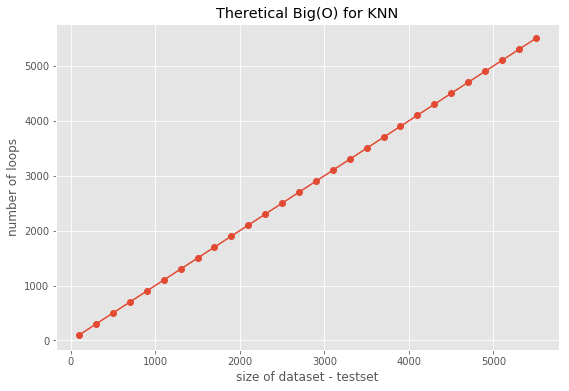

In [117]:
# BIG O PLOT LOOP COUNTER for variation in size of test set


def main(testSet, k):
    global loopCounter
    # prepare data
    
    trainingSet = trainingSet2


    print('Train set: ' + repr(len(trainingSet)))
    print('Test set: ' + repr(len(testSet)))
    
    # generate predictions
    predictions=[]
    
    for x in range(len(testSet)):
        loopCounter += 1
        neighbors = Neighbours(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')


import random
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,6))

nvals = [n for n in range(100,len(largedata), 200)]




loopvals = []
for n in nvals:
    print(n)
    loopCounter=0
    main(testSet= random.sample(largedata, n), k=19)
    loopvals.append(loopCounter)



plt.xlabel('size of dataset - testset')
plt.ylabel('number of loops')
plt.title('Theretical Big(O) for KNN')
plt.plot(nvals, loopvals, 'o-');
#took the plot part from seminar 8, but coded the rest myself

100
Train set: 100
Test set: 212
Accuracy: 92.45283018867924%
300
Train set: 300
Test set: 212
Accuracy: 94.81132075471697%
500
Train set: 500
Test set: 212
Accuracy: 95.75471698113208%
700
Train set: 700
Test set: 212
Accuracy: 96.22641509433963%
900
Train set: 900
Test set: 212
Accuracy: 94.81132075471697%
1100
Train set: 1100
Test set: 212
Accuracy: 96.22641509433963%
1300
Train set: 1300
Test set: 212
Accuracy: 96.69811320754717%
1500
Train set: 1500
Test set: 212
Accuracy: 97.64150943396226%
1700
Train set: 1700
Test set: 212
Accuracy: 98.11320754716981%
1900
Train set: 1900
Test set: 212
Accuracy: 97.16981132075472%
2100
Train set: 2100
Test set: 212
Accuracy: 96.69811320754717%
2300
Train set: 2300
Test set: 212
Accuracy: 97.64150943396226%
2500
Train set: 2500
Test set: 212
Accuracy: 97.64150943396226%
2700
Train set: 2700
Test set: 212
Accuracy: 98.58490566037736%
2900
Train set: 2900
Test set: 212
Accuracy: 97.16981132075472%
3100
Train set: 3100
Test set: 212
Accuracy: 97.64

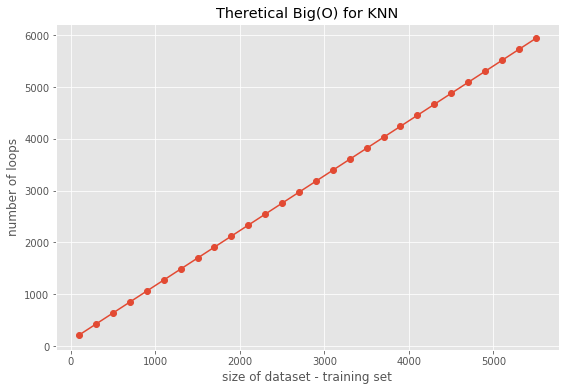

In [116]:
# BIG O PLOT LOOP COUNTER for variation in size of test set

global loopCounter
loopCounter = 0

def main(trainingSet, k):
    global loopCounter

    # prepare data
    testSet = testSet2

    print('Train set: ' + repr(len(trainingSet)))
    print('Test set: ' + repr(len(testSet)))
    
    # generate predictions
    predictions=[]
    
    for x in range(len(testSet)):
        loopCounter += 1
        neighbors = Neighbours(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')


import random
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,6))

nvals = [n for n in range(100,len(largedata), 200)]




loopvals = []
for n in nvals:
    print(n)
    main(trainingSet= random.sample(largedata, n), k=19)
    loopvals.append(loopCounter)



plt.xlabel('size of dataset - training set')
plt.ylabel('number of loops')
plt.title('Theretical Big(O) for KNN')
plt.plot(nvals, loopvals, 'o-');
#took the plot part from seminar 8, but coded the rest myself

1
Train set: 471
Test set: 227
Accuracy: 94.27312775330397%
51
Train set: 471
Test set: 227
Accuracy: 94.27312775330397%
101
Train set: 471
Test set: 227
Accuracy: 92.95154185022027%
151
Train set: 471
Test set: 227
Accuracy: 90.7488986784141%
201
Train set: 471
Test set: 227
Accuracy: 89.42731277533039%
251
Train set: 471
Test set: 227
Accuracy: 88.54625550660793%
301
Train set: 471
Test set: 227
Accuracy: 86.78414096916299%


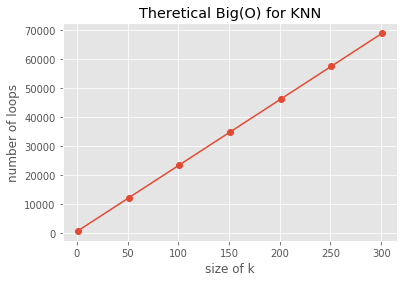

In [380]:
# BIG O PLOT LOOP COUNTER for variation in size of k-value

def main(k):
    global loopCounter
    # prepare data
    
    trainingSet = train
    testSet = test
   
    print('Train set: ' + repr(len(trainingSet)))
    print('Test set: ' + repr(len(testSet)))
    
    # generate predictions
    predictions=[]
    
    for x in range(len(testSet)):
        loopCounter += 1
        neighbors = kNearestNeighbours(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')


import random
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,6))

nvals = [n for n in range(1,350, 50)]




loopvals = []
for n in nvals:
    print(n)
    loopCounter=0
    main(n +1 )
    loopvals.append(loopCounter)



plt.xlabel('size of k')
plt.ylabel('number of loops')
plt.title('Theretical Big(O) for KNN')
plt.plot(nvals, loopvals, 'o-');
#took the plot part from seminar 8, but coded the rest myself

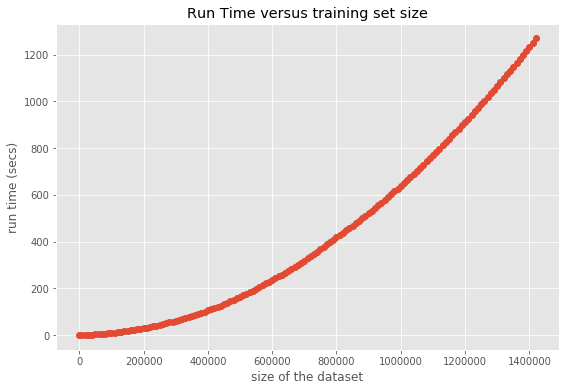

In [82]:
%matplotlib inline
import time
from matplotlib import pyplot as plt
from timeit import repeat      
from functools import partial  

def Neighbours(trainingSet, testRecord, k):
    
    distances = [] 
    length = len(testRecord)-1
    for x in range(len(trainingSet)): 
  
        dist = Euclidiandistance(testRecord, trainingSet[x], length)                                                             
        distances.append((trainingSet[x], dist)) 
    distances.sort(key=operator.itemgetter(1)) 
                                      
    neighbours = []
    for x in range(k):
       
        neighbours.append(distances[x][0]) 
    return neighbours 


nvals = [n for n in range(10, len(largedata),10000)]         
    
times = []
t = time.process_time()
for n in nvals:
    
    Neighbours(random.sample(largedata,n), testSet2[0], k=3)
   
    elapsed_time = time.process_time() - t
    times.append(elapsed_time)
plt.figure(figsize=(9,6))
plt.xlabel('size of the dataset')
plt.ylabel('run time (secs)')
plt.title('Run Time versus training set size')
plt.plot(nvals, times, 'o-');
#took the plot part from seminar 8, but coded the rest myself

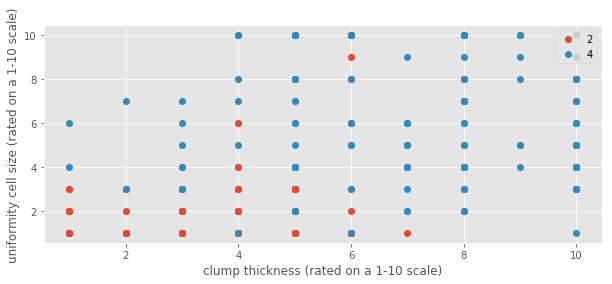

In [520]:
clump_thickness = [record[0] for record in train]

uniformity_cell_size =  [record[1] for record in train]

target = [record[9] for record in train]


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,4)) 

for s in set(target):
    
    xvals = [clump_thickness[i] for i in range(len(target)) if target[i]==s]
    yvals = [uniformity_cell_size[i] for i in range(len(target)) if target[i]==s]
    plt.plot(xvals, yvals, 'o', label=s)

plt.legend(loc=1)
plt.xlabel('clump thickness (rated on a 1-10 scale)')
plt.ylabel('uniformity cell size (rated on a 1-10 scale)');
#took from seminar 8, but adapted it for my data

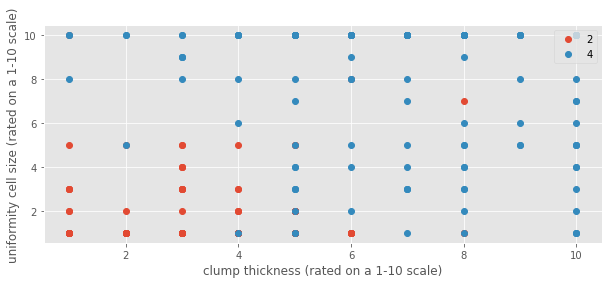

In [479]:
clump_thickness = [record[0] for record in trainingSet2]
single_epithelial_cell_size =  [record[5] for record in trainingSet2]
target = [record[9] for record in trainingSet2]

from numpy import arange
dataset=trainingSet2
testdata = []
for x in arange(4,8,0.05):
    for y in arange(2,4.5, 0.05):
        testdata.append([x,y,None,None,None])
for r in testdata:
    r[4], _ = knnPrediction(dataset, r, k=19)


# assumes matplotlib initialisation already completed earlier
plt.style.use('ggplot')
plt.figure(figsize=(10,4)) 

for s in set(target):
    xvals = [clump_thickness[i] for i in range(len(target)) if target[i]==s]
    yvals = [single_epithelial_cell_size[i] for i in range(len(target)) if target[i]==s]
    plt.plot(xvals, yvals, 'o', label=s)
plt.legend(loc=1)
plt.xlabel('clump thickness (rated on a 1-10 scale)')
plt.ylabel('uniformity cell size (rated on a 1-10 scale)');
#took from seminar 8, but adapted it for my data